In [1]:
from model import Make_Dataset
import numpy as np
import pandas as pd
from tqdm import tqdm
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment',  None)

In [2]:
data=Make_Dataset.Integration_data(get_data = True, first_try = True)

Total stay 20767


100%|██████████| 20767/20767 [03:39<00:00, 94.59it/s] 


total stay dataframe shape (3000540, 228)


In [14]:
data=pd.read_csv('Total.csv', index_col=0)
data = data.reset_index()

In [15]:
data['index'] = (data['index'].values)
data = data.rename(columns = {'index': 'Time_since_ICU_admission'})

In [4]:
# 인종정보
# ['AMERICAN INDIAN/ALASKA NATIVE' 'ASIAN' 'ASIAN - ASIAN INDIAN'
#  'ASIAN - CHINESE' 'ASIAN - KOREAN' 'ASIAN - SOUTH EAST ASIAN'
#  'BLACK/AFRICAN' 'BLACK/AFRICAN AMERICAN' 'BLACK/CAPE VERDEAN'
#  'BLACK/CARIBBEAN ISLAND' 'HISPANIC OR LATINO'
#  'HISPANIC/LATINO - CENTRAL AMERICAN' 'HISPANIC/LATINO - COLUMBIAN'
#  'HISPANIC/LATINO - CUBAN' 'HISPANIC/LATINO - DOMINICAN'
#  'HISPANIC/LATINO - GUATEMALAN' 'HISPANIC/LATINO - HONDURAN'
#  'HISPANIC/LATINO - MEXICAN' 'HISPANIC/LATINO - PUERTO RICAN'
#  'HISPANIC/LATINO - SALVADORAN' 'MULTIPLE RACE/ETHNICITY'
#  'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER' 'OTHER'
#  'PATIENT DECLINED TO ANSWER' 'PORTUGUESE' 'SOUTH AMERICAN'
#  'UNABLE TO OBTAIN' 'UNKNOWN' 'WHITE' 'WHITE - BRAZILIAN'
#  'WHITE - EASTERN EUROPEAN' 'WHITE - OTHER EUROPEAN' 'WHITE - RUSSIAN']

# 보험정보
# ['Medicaid' 'Medicare' 'Other']

# 성별정보
# ['F' 'M']

In [16]:
bulk_changes_pmpe = {
    225792 : 'Invasive_Ventilation', 225794 : 'None_Invasive_Ventilation',
    225402 : 'EKG', 223253 : 'MRI', 225459 : 'CXR', 225975:'HeparinSodium',
    225152 : 'HeparinSodium', 225152.2 : 'HeparinSodium_rate', 225157 : 'Tirofiban', 225157.2 : 'Tirofiban_rate', 221261 : 'Abciximab',
    229069 : 'Digoxin', 229617 : 'Epinephrine', 221289 : 'Epinephrine', 221289.2 : 'Epinephrine_rate',  225166: 'Potassium_Chloride', 225166.2: 'Potassium_Chloride_rate',
    225876 : 'Imipenem', 225893 : 'Piperacillin_Tazobactam', 225893.2 : 'Piperacillin_Tazobactam_rate', 226509 : 'extra_blood',
    227080 : 'Fluids_supplement', 220949: 'Dextrose_5%', 220949.2: 'Dextrose_5%_rate', 225401 : 'blood_cultured', 225437 : 'blood_cultured',
    221906 : 'Norepinephrine', 221906.2 : 'Norepinephrine_rate', 221749: 'Phenylephrine', 221749.2: 'Phenylephrine_rate', 222056 : 'Nitroglycerin', 222056.2 : 'Nitroglycerin_rate', 221662 : 'Dopamine', 221662.2 : 'Dopamine_rate',
    221468 : 'Diltiazem', 221468.2 : 'Diltiazem_rate',222315.2 : 'Vasopressin_rate',
    222315 : 'Vasopressin', 229630 : 'Phenylephrine (50/250)', 229630.2 : 'Phenylephrine (50/250)_rate',
    222051 : 'Nitroprusside', 222051.2 : 'Nitroprusside_rate', 225153 : 'Labetalol', 225153.2 : 'Labetalol_rate', 221986 : 'Milrinone',221986.2 : 'Milrinone_rate',
    221555 : 'Cisatracurium', 221555.2 : 'Cisatracurium_rate', 221653 : 'Dobutamine', 221653.2 : 'Dobutamine_rate', 221429 : 'Esmolol', 221429.2 : 'Esmolol_rate',
    229233 : 'Rocuronium', 229233.2 : 'Rocuronium_rate', 229632: 'Phenylephrine (200/250)', 229632.2: 'Phenylephrine (200/250)_rate', 222037:'Nesiritide',
    222062 : 'Vecuronium', 222062.2 : 'Vecuronium_rate', 220490 : 'Water', 220587: 'AST', 220644:'ALT', 221342: 'Aminophylline', 225974:'metoprolol', 225974.2:'metoprolol_rate',
    228140: 'Dextrose_20%', 228141: 'Dextrose_30%', 228142: 'Dextrose_40%', 220950 : 'Dextrose_10%', 220952 : 'Dextrose_50%', 225158 : 'NaCl 0.9%', 225159 : 'NaCl 0.45%', 225161 : 'NaCl 3%',
    225162 : 'Prismasate K2', 225163 : 'Prismasate K4', 225164 : 'Trisodium Citrate 0.4%', 225165 : 'Bicarbonate Base', 225797 : 'Free Water', 225799: 'Gastric Meds', 225823 : 'D5 1/2NS', 225825 : 'D5NS',
    225827 : 'D5LR', 225828 : 'LR', 225830 : 'Multivitamins', 225941 : 'D5 1/4NS', 225944 : 'Sterile Water', 226089 : 'Piggyback', 226361 : 'Pre-Admission/Non-ICU Intake', 226362 : 'ZGastric/TF Residual Intake',
    226363 : 'Cath Lab Intake', 226364 : 'OR Crystalloid Intake', 226375 : 'PACU Crystalloid Intake', 226377 : 'PACU PO Intake', 226401 : 'GU Irrigant - Normal Saline', 226402 : 'GU Irrigant - Sterile Water',
    226403 : 'GU Irrigant - Amphotericin B', 226452 : 'PO Intake', 226453 : 'GT Flush', 227533 : 'Sodium Bicarbonate 8.4% (Amp)', 228341 : 'NaCl 23.4%'
    }

bulk_changes_ce = {
    220045 : 'HR', 220050 : 'ABPs', 220051 : 'ABPd',
    220088 : 'CO', 224842 : 'CO', 220277 : 'SpO2',
    228302 : 'RASS', 224695 : 'Peak_insp_P', 227467 : 'INR',
    225668 : 'Lactate', 220621 : 'glucose', 227444 : 'CRP',
    220059 : 'PAPs', 220060 : 'PAPd', 223771 : 'PCWP',
    223772 : 'SvO2', 220074 : 'CVP', 220179 : 'NIBPs', 
    220180 : 'NIBPd', 228640 : 'EtCO2', 220210 : 'RR',
    224639 : 'weight', 226730 : 'height',
    223830 : 'pH', 220235 : 'pCO2', 220224 : 'PaO2',
    227686 : 'CVOS', 227429 : 'Troponin-T', 227457 : 'Platelet_count',
    223761 : 'temperature_F', 223762 : 'temperature_C', 227442 : 'K+',
    227464 : 'K+', 225625 : 'Ca_non_ionized', 225612 : 'Alkaline_Phosphate',
    220228 : 'hemoglobin', 226540 : 'hematocrit', 220545 : 'hematocrit',
    225690 : 'total_bilirubin', 220615 : 'creatinine', 223835 : 'FiO2',
    220739 : 'Eye_Opening', 223900 : 'verbal_reponse', 223901 : 'mortor_response',
    50819  : 'PEEP', 224700: 'PEEP_chart', 225323 : 'catheter', 225357: 'catheter', 225387: 'catheter', 225388: 'catheter',
    225389: 'catheter', 225725: 'catheter', 225730: 'catheter', 225731: 'catheter', 225734 : 'catheter',225285: 'catheter',
}

bulk_changes_fluids = {228193 : 'eCMO', 229266 : 'eCMO', 229267 : 'eCMO', 229268 : 'eCMO', 229269 : 'eCMO', 229270 : 'eCMO', 229271 : 'eCMO',
                229272 : 'eCMO', 229273 : 'eCMO', 229274 : 'eCMO', 229275 : 'eCMO', 229276 : 'eCMO', 229277 : 'eCMO', 229277 : 'eCMO',
                229278 : 'eCMO', 229279 : 'eCMO', 229280 : 'eCMO', 229363 : 'eCMO', 229364 : 'eCMO', 229365 : 'eCMO', 229841 : 'eCMO',
                229842 : 'eCMO', 229843 : 'eCMO', 229844 : 'eCMO', 229845 : 'eCMO', 229846 : 'eCMO', 229847 : 'eCMO', 229848 : 'eCMO',
                229849 : 'eCMO', 229850 : 'eCMO', 229851 : 'eCMO', 229852 : 'eCMO', 229853 : 'eCMO', 229854 : 'eCMO', 229855 : 'eCMO',
                229873 : 'eCMO', 229874 : 'eCMO', 229875 : 'eCMO', 229876 : 'eCMO', 229877 : 'eCMO', 229878 : 'eCMO', 229879 : 'eCMO',
                224660 : 'eCMO', 
                228866 : 'iABP', 220120 : 'iABP', 224309 : 'iABP', 224310 : 'iABP', 224311 : 'iABP', 224315 : 'iABP', 224317 : 'iABP',
                224322 : 'iABP', 224652 : 'iABP', 224654 : 'iABP', 225339 : 'iABP', 225341 : 'iABP', 225342 : 'iABP', 225727 : 'iABP',
                225742 : 'iABP', 225788 : 'iABP', 225979 : 'iABP', 225980 : 'iABP', 225981 : 'iABP', 225982 : 'iABP', 225984 : 'iABP',
                225985 : 'iABP', 225986 : 'iABP', 225987 : 'iABP', 225988 : 'iABP', 226110 : 'iABP', 227355 : 'iABP', 227754 : 'iABP',
                227980 : 'iABP', 228145 : 'iABP', 228146 : 'iABP',
                229311 : 'impella', 229312 : 'impella', 229668 : 'impella', 229669 : 'impella', 229670 : 'impella', 229671 : 'impella', 229673 : 'impella',
                229674 : 'impella', 229675 : 'impella', 229676 : 'impella', 229677 : 'impella', 229678 : 'impella', 229679 : 'impella', 229781 : 'impella',
                229896 : 'impella', 229897 : 'impella', 229898 : 'impella', 229899 : 'impella', 229900 : 'impella', 224314 : 'impella', 224318 : 'impella',
                228148 : 'impella', 228149 : 'impella', 228151 : 'impella', 228152 : 'impella', 228153 : 'impella', 228154 : 'impella', 228156 : 'impella',
                228157 : 'impella', 228158 : 'impella', 228159 : 'impella', 228162 : 'impella', 228163 : 'impella', 228164 : 'impella'}

bulk_changes_le = {
    50983 : 'sodium', 52623 : 'sodium', 50817 : 'SpO2',
    50813: 'Lactate', 52442 : 'Lactate', 50809 : 'glucose',
    50820 : 'pH', 50825 : 'temperature_C', 50971 : 'K+',
    52610: 'K+', 50822 : 'K+', 50893  : 'Ca_non_ionized', 
    52034 : 'Ca_non_ionized', 52035 : 'Ca_non_ionized', 
    50863 : 'Alkaline_Phosphate', 53086 : 'Alkaline_Phosphate',
    50811 : 'hemoglobin', 51222 : 'hemoglobin', 51640 : 'hemoglobin',
    51221 : 'hematocrit', 51638 : 'hematocrit', 51639 : 'hematocrit', 
    52028 : 'hematocrit', 50810 : 'hematocrit', 
    50912 : 'creatinine', 52546 : 'creatinine', 52024 : 'creatinine', 
    50885 : 'total_bilirubin', 53089 : 'total_bilirubin',
    51108 : 'Urine_Output', 51109 : 'Urine_Output', 50886 : 'blood_cultured',
    70011 : 'blood_cultured', 70012 : 'blood_cultured', 51265 : 'Platelet_count',
    51704 : 'Platelet_count', 50861 : 'ALT', 50878 : 'AST', 51300 : 'WBC', 51301: 'WBC', 51755: 'WBC', 220546: 'WBC',
    51006: 'BUN', 52647 :'BUN', 225624:'BUN', 224417 : 'cuff pressure',  224418:'cuff volume', 224684: 'Tidal_Volume(set)', 224685 : 'Tidal_Volume(observed)',
    224686: 'Tidal_Volume(spontaneous)',  224688:'Respiratory Rate(set)', 224689:'Respiratory Rate(spontaneous)',  224690:'Respiratory Rate(Total)',
    225303 : 'Mask_Ventilation(intubation)'

}


bulk_changes_oe = {
    226557 : 'Urine_Output', 226558 : 'Urine_Output', 226559 : 'Urine_Output', 226560 : 'Urine_Output', 226561 : 'Urine_Output',
    226563 : 'Urine_Output', 226564 : 'Urine_Output', 226565 : 'Urine_Output', 226566 : 'Urine_Output', 226567 : 'Urine_Output',
    226584 : 'Urine_Output', 226627 : 'Urine_Output', 226631 : 'Urine_Output', 226632 : 'Urine_Output', 227488 : 'Urine_Output_in', 227489 : 'Urine_Output_out'
}


bulk_changes_an =  {225840 : 'Antibiotic', 225875 : 'Antibiotic', 225883 : 'Antibiotic', 225876 : 'Antibiotic', 225893 : 'Antibiotic', 229064 : 'Antibiotic',
    225850 : 'Antibiotic', 225855 : 'Antibiotic', 225859 : 'Antibiotic', 225860 : 'Antibiotic', 225865 : 'Antibiotic', 225798 : 'Antibiotic',
    225837 : 'Antibiotic', 225838 : 'Antibiotic', 225842 : 'Antibiotic', 225843 : 'Antibiotic', 225844 : 'Antibiotic', 225845 : 'Antibiotic',
    225847 : 'Antibiotic', 225848 : 'Antibiotic', 225851 : 'Antibiotic', 225857 : 'Antibiotic', 225859 : 'Antibiotic' ,225862 : 'Antibiotic',
    225863 : 'Antibiotic', 225866 : 'Antibiotic', 225868 : 'Antibiotic', 225869 : 'Antibiotic', 225871 : 'Antibiotic', 225873 : 'Antibiotic',
    225875 : 'Antibiotic', 225876 : 'Antibiotic', 225877 : 'Antibiotic', 225879 : 'Antibiotic', 225881 : 'Antibiotic', 225882 : 'Antibiotic',
    225883 : 'Antibiotic', 225884 : 'Antibiotic', 225885 : 'Antibiotic', 225886 : 'Antibiotic', 225888 : 'Antibiotic', 225889 : 'Antibiotic', 
    225890 : 'Antibiotic', 225892 : 'Antibiotic', 225893 : 'Antibiotic', 225895 : 'Antibiotic', 225896 : 'Antibiotic', 225897 : 'Antibiotic',
    225898 : 'Antibiotic', 225899 : 'Antibiotic', 225900 : 'Antibiotic', 225902 : 'Antibiotic', 225903 : 'Antibiotic', 225905 : 'Antibiotic',
    227691 : 'Antibiotic', 228003 : 'Antibiotic', 229059 : 'Antibiotic', 229061 : 'Antibiotic', 229064 : 'Antibiotic', 229587 : 'Antibiotic'
    }

bulk_changes_pmpe.update(bulk_changes_ce)
bulk_changes_pmpe.update(bulk_changes_le)
bulk_changes_pmpe.update(bulk_changes_oe)
bulk_changes_pmpe.update(bulk_changes_an)
bulk_changes_pmpe.update(bulk_changes_fluids)

In [17]:
col_name_mapper = {str(key): value for key, value in bulk_changes_pmpe.items()}
data = data.rename(columns=col_name_mapper)
data.head(2)

,Time_since_ICU_admission,Phenylephrine,NaCl 0.9%,Dextrose_5%,Norepinephrine,PO Intake,NaCl 0.45%,LR,D5 1/2NS,Vasopressin,Piggyback,Dobutamine,Phenylephrine (50/250),Dopamine,Esmolol,Sterile Water,Epinephrine,Nitroprusside,NaCl 3%,Milrinone,Multivitamins,D5LR,D5NS,Dextrose_10%,Pre-Admission/Non-ICU Intake,Labetalol,OR Crystalloid Intake,Antibiotic,Antibiotic,GT Flush,Gastric Meds,Antibiotic,Antibiotic,NaCl 23.4%,Antibiotic,Cath Lab Intake,Antibiotic,D5 1/4NS,Antibiotic,Antibiotic,Antibiotic,Antibiotic,metoprolol,Dextrose_20%,Antibiotic,PACU Crystalloid Intake,Antibiotic,Sodium Bicarbonate 8.4% (Amp),Antibiotic,Antibiotic,Antibiotic,Nesiritide,Dextrose_50%,Antibiotic,Antibiotic,Antibiotic,Antibiotic,Phenylephrine (200/250),Antibiotic,Antibiotic,Antibiotic,Antibiotic,Antibiotic,Free Water,Antibiotic,Antibiotic,Antibiotic,Antibiotic,Antibiotic,Dextrose_40%,Antibiotic,Digoxin,Antibiotic,Antibiotic,Dextrose_30%,Antibiotic,Antibiotic,Antibiotic,Antibiotic,Antibiotic,Antibiotic,Antibiotic,Antibiotic,Epinephrine,Antibiotic,impella,Water,extra_blood,Invasive_Ventilation,CXR,EKG,None_Invasive_Ventilation,MRI,INR,glucose,ALT,Alkaline_Phosphate,BUN,Ca_non_ionized,total_bilirubin,Troponin-T,K+,hemoglobin,WBC,Platelet_count,creatinine,AST,Lactate,SpO2,HR,NIBPs,NIBPd,PAPs,PAPd,CVP,hematocrit,Eye_Opening,verbal_reponse,mortor_response,weight,ABPd,ABPs,PaO2,PEEP_chart,Tidal_Volume(observed),Respiratory Rate(Total),Peak_insp_P,FiO2,Tidal_Volume(set),pCO2,temperature_C,PCWP,pH,catheter,cuff pressure,EtCO2,iABP,iABP,iABP,iABP,iABP,height,Tidal_Volume(spontaneous),CO,cuff volume,iABP,iABP,iABP,iABP,iABP,iABP,CO,SvO2,CRP,impella,eCMO,eCMO,impella,impella,eCMO,eCMO,eCMO,impella,impella,catheter,CVOS,impella,impella,impella,impella,impella,impella,iABP,catheter,impella,impella,impella,impella,impella,eCMO,eCMO,eCMO,eCMO,eCMO,eCMO,eCMO,eCMO,eCMO,eCMO,eCMO,eCMO,eCMO,eCMO,eCMO,eCMO,eCMO,catheter,eCMO,catheter,impella,iABP,iABP,impella,impella,impella,iABP,iABP,eCMO,glucose,creatinine,BUN,ALT,AST,WBC,Platelet_count,pH,Lactate,SpO2,WBC,creatinine,Urine_Output,Urine_Output,subject_id,stay_id,hadm_id,Age,gender,ethnicity,insurance
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,7.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.0,NaN,NaN,NaN,NaN,NaN,NaN,7.35,3.3,NaN,NaN,NaN,NaN,NaN,10002013,39060235,23581541,53,0,22,1
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,7.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177.0,NaN,NaN,NaN,NaN,NaN,NaN,7.40,2.8,NaN,NaN,NaN,NaN,NaN,10002013,39060235,23581541,53,0

In [18]:
dataset = data.copy()

In [19]:
duplicates = dataset.columns[dataset.columns.duplicated()].unique()
duplicates

Index(['Antibiotic', 'Epinephrine', 'iABP', 'CO', 'impella', 'eCMO',
       'catheter', 'glucose', 'creatinine', 'BUN', 'ALT', 'AST', 'WBC',
       'Platelet_count', 'pH', 'Lactate', 'SpO2', 'Urine_Output'],
      dtype='object')

In [20]:
dataset['urin_amount'] = dataset['Urine_Output'].sum(axis=1)
dataset = dataset.drop(['Urine_Output'], axis=1)

dataset['Antibiotics'] = dataset['Antibiotic'].sum(axis=1)
dataset = dataset.drop(['Antibiotic'], axis=1)

dataset['Cardiac_output'] = dataset['CO'].iloc[:, 0]
dataset = dataset.drop(['CO'], axis=1)

dataset['Creatinine'] = dataset['creatinine'].mean(axis=1) 
dataset = dataset.drop(['creatinine'], axis=1)

dataset['bun'] = dataset['BUN'].mean(axis=1) 
dataset = dataset.drop(['BUN'], axis=1)

dataset['Platelet_Count'] = dataset['Platelet_count'].mean(axis=1) 
dataset = dataset.drop(['Platelet_count'], axis=1)

dataset['wbc'] = dataset['WBC'].max(axis=1) 
dataset = dataset.drop(['WBC'], axis=1)

dataset['PH'] = dataset['pH'].mean(axis=1) 
dataset = dataset.drop(['pH'], axis=1)

dataset['ALAT'] = dataset['ALT'].mean(axis=1) 
dataset = dataset.drop(['ALT'], axis=1)

dataset['ASAT'] = dataset['AST'].mean(axis=1) 
dataset = dataset.drop(['AST'], axis=1)

dataset['Serum Glucose'] = dataset['glucose'].mean(axis=1) 
dataset = dataset.drop(['glucose'], axis=1)

dataset['SPO2'] = dataset['SpO2'].max(axis=1) 
dataset = dataset.drop(['SpO2'], axis=1)

dataset['Catheter'] = dataset['catheter'].sum(axis=1) 
dataset = dataset.drop(['catheter'], axis=1)

dataset['ECMO'] = dataset['eCMO'].sum(axis=1) 
dataset = dataset.drop(['eCMO'], axis=1)

dataset['IABP'] = dataset['iABP'].sum(axis=1) 
dataset = dataset.drop(['iABP'], axis=1)

dataset['Impella'] = dataset['impella'].sum(axis=1) 
dataset = dataset.drop(['impella'], axis=1)

In [21]:
duplicates = dataset.columns[dataset.columns.duplicated()].unique()

In [23]:
col_df = dataset.copy()

In [29]:
# 중복된 컬럼 이름
duplicate_column_name = 'Lactate'

# 중복된 컬럼 이름의 모든 인덱스 찾기
duplicate_column_indices = [i for i, col in enumerate(col_df.columns) if col == duplicate_column_name]
index_to_remove = duplicate_column_indices[1]  # 첫 번째 중복 컬럼의 인덱스
remaining_column_indices = [i for i in range(col_df.shape[1]) if i != index_to_remove]

# 새로운 데이터프레임 생성
remaining_column_indices = [i for i in range(col_df.shape[1]) if i != index_to_remove]

# 새로운 데이터프레임 생성
dataset_1 = col_df.iloc[:, remaining_column_indices]

In [30]:
# 중복된 컬럼 이름
duplicate_column_name = 'Epinephrine'

# 중복된 컬럼 이름의 모든 인덱스 찾기
duplicate_column_indices = [i for i, col in enumerate(dataset_1.columns) if col == duplicate_column_name]

# 원하는 인덱스의 컬럼 제거 (예시로 첫 번째 'Epinephrine' 컬럼 제거)
index_to_remove = duplicate_column_indices[1]  

remaining_column_indices = [i for i in range(dataset_1.shape[1]) if i != index_to_remove]

# 새로운 데이터프레임 생성
dataset_2 = dataset_1.iloc[:, remaining_column_indices]

In [32]:
dataset_2['Antibiotics'] = dataset_2['Antibiotics'].apply(lambda x: 1 if not pd.isna(x) and x > 0 else 0)
dataset_2['Catheter'] = dataset_2['Catheter'].apply(lambda x: 1 if not pd.isna(x) and x > 0 else 0)
dataset_2['ECMO'] = dataset_2['ECMO'].apply(lambda x: 1 if not pd.isna(x) and x > 0 else 0)
dataset_2['IABP'] = dataset_2['IABP'].apply(lambda x: 1 if not pd.isna(x) and x > 0 else 0)
dataset_2['Impella'] = dataset_2['Impella'].apply(lambda x: 1 if not pd.isna(x) and x > 0 else 0)

In [62]:
def annotation(df):
    # DataFrame 복사본 생성
    targ = df.copy()

    targ['Annotation'] = np.nan

    # 각 stay_id에 대해 반복
    for stay_id in tqdm(targ['stay_id'].unique()):
        stay_df = targ[targ['stay_id'] == stay_id].sort_values(by='Time_since_ICU_admission')
        for idx, row in stay_df.iterrows():
            current_time = row['Time_since_ICU_admission']
            pastpoint_window_1h = current_time - 1
        
            # 1시간 이전 데이터 필터링
            relevant_rows = stay_df[(stay_df['Time_since_ICU_admission'] <= current_time) & (stay_df['Time_since_ICU_admission'] >= pastpoint_window_1h)]
            # 조건 확인
            no_circ_cond = (relevant_rows['MAP'].mean() > 65.0) & (relevant_rows['vasoactive/inotropic'] == 0.0).all() & (relevant_rows['Lactate'] < 2).any()
            circ_cond = ((relevant_rows['MAP'].mean() <= 65.0) | (relevant_rows['vasoactive/inotropic'] == 1.0).any()) & (relevant_rows['Lactate'] >= 2).any()
            
            # Annotation 결정
            if no_circ_cond:
                targ.at[idx, 'Annotation'] = 'no_circ'
            elif circ_cond:
                targ.at[idx, 'Annotation'] = 'circ'
            else:
                targ.at[idx, 'Annotation'] = 'ambiguous'

    return targ

In [34]:
dataset_2['weight_fillna'] = 0
dataset_2['height_fillna'] = 0

dataset_2.loc[dataset_2['weight'].isnull(), 'weight_fillna'] = 1
dataset_2.loc[dataset_2['height'].isnull(), 'height_fillna'] = 1

dataset_2[['weight', 'height']]=dataset_2[['weight', 'height']].fillna(0)

In [26]:
null_columns = dataset_2.columns[dataset_2.isnull().any()].tolist()

In [50]:
for_impute.head()

,Time_since_ICU_admission,Phenylephrine,NaCl 0.9%,Dextrose_5%,Norepinephrine,PO Intake,NaCl 0.45%,LR,D5 1/2NS,Vasopressin,Piggyback,Dobutamine,Phenylephrine (50/250),Dopamine,Esmolol,Sterile Water,Epinephrine,Nitroprusside,NaCl 3%,Milrinone,Multivitamins,D5LR,D5NS,Dextrose_10%,Pre-Admission/Non-ICU Intake,Labetalol,OR Crystalloid Intake,GT Flush,Gastric Meds,NaCl 23.4%,Cath Lab Intake,D5 1/4NS,metoprolol,Dextrose_20%,PACU Crystalloid Intake,Sodium Bicarbonate 8.4% (Amp),Nesiritide,Dextrose_50%,Phenylephrine (200/250),Free Water,Dextrose_40%,Digoxin,Dextrose_30%,Water,extra_blood,Invasive_Ventilation,CXR,EKG,None_Invasive_Ventilation,MRI,INR,Alkaline_Phosphate,Ca_non_ionized,total_bilirubin,Troponin-T,K+,hemoglobin,Lactate,HR,NIBPs,NIBPd,PAPs,PAPd,CVP,hematocrit,Eye_Opening,verbal_reponse,mortor_response,weight,ABPd,ABPs,PaO2,PEEP,Tidal_Volume(observed),Respiratory Rate(Total),Peak_insp_P,FiO2,Tidal_Volume(set),pCO2,temperature_C,PCWP,cuff pressure,EtCO2,height,Tidal_Volume(spontaneous),cuff volume,SvO2,CRP,CVOS,subject_id,stay_id,hadm_id,Age,gender,ethnicity,insurance,urin_amount,Antibiotics,Cardiac_output,Creatinine,bun,Platelet_Count,wbc,PH,ALAT,ASAT,Serum Glucose,SPO2,Catheter,ECMO,IABP,Impella,weight_fillna,height_fillna,Tidal_Volume(set)_fillna,Tidal_Volume(observed)_fillna,Tidal_Volume(spontaneous)_fillna,cuff volume_fillna,Cardiac_output_fillna
0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11.90,3.3,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,0.0,NaN,NaN,410.0,NaN,0.0,NaN,NaN,NaN,0.0,45.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,10002013,39060235,23581541,53,0,22,1,0.0,0,0.0,NaN,NaN,NaN,NaN,7.35,NaN,NaN,216.0,NaN,0,0,0,0,1,1,1,1,1,1,1
1,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12.00,2.8,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,0.0,NaN,NaN,410.0,NaN,0.0,NaN,NaN,NaN,0.0,41.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,10002013,39060235,23581541,53,0,22,1,0.0,0,0.0,NaN,NaN,NaN,NaN,7.40,NaN,NaN,177.0,NaN,0,0,0,0,1,1,1,1,1,1,1
2,2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11.80,3.1,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,0.0,NaN,NaN,384.0,NaN,0.0,NaN,NaN,NaN,0.0,56.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,10002013,39060235,23581541,53,0,22,1,0.0,0,0.0,NaN,NaN,NaN,NaN,7.27,NaN,NaN,177.0,NaN,0,0,0,0,1,1,1,1,1,1,1
3,3,0.0,2.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.135135,0.0,0.0,0.0,0.0,0.0,0.0,1.2,NaN,NaN,NaN,NaN,NaN,10.25,2.6,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,0.0,NaN,NaN,311.0,5.0,568.0,14.0,30.0,100.0,500.0,47.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,10002013,39060235,23581541,53,0,22,1,0.0,0,0.0,NaN,NaN,252.0,18.2,7.32,NaN,NaN,135.0,NaN,0,0,0,0,1,1,0,0,1,1,1
4,4,0.0,5.0,268.666675,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.749220,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,4.0,11.20,2.6,84.0,NaN,NaN,27.5,16.0,11.0,31.0,1.0,1.0,1.0,0.0,65.0,112.0,332.0,5.0,587.0,16.0,29.0,50.0,500.0,46.0,37.1,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,10002013,39060235,23581541,53,0,22,1,0.0,0,0.0,1.1,16.0,254.0,20.2,7.34,NaN,NaN,154.0,100.0,0,0,0,0,1,1,0,0,1,1,1


In [ ]:
# 'Prismasate K2', 'Prismasate K4', 'Trisodium Citrate 0.4%', 'Bicarbonate Base', 'ZGastric/TF Residual Intake', 'PACU PO Intake', 'GU Irrigant - Normal Saline', 'GU Irrigant - Sterile Water', 'GU Irrigant - Amphotericin B' 없음

In [55]:
dataset_2 = dataset_2.rename(columns = {'PEEP_chart':'PEEP'})#cmHg

monitor_dict ={'HR': 70 , 'Respiratory Rate(Total)' : 12,  'NIBPs': 125, 'NIBPd':75, 'CVP': 4, 'PAPd': 11, 'PAPs': 22, 'ABPd': 75,'ABPs':125, 'FiO2': 21,
               'temperature_C':36.5, 'CVOS': 70, 'cuff pressure':25, 'PCWP':5, 'PaO2': 75, 'EtCO2':40}

labtest_dict ={'hemoglobin': 12, 'INR': 1, 'hematocrit': 42, 'pCO2': 40, 'Eye_Opening':4, 'mortor_response':6,
               'verbal_reponse':5, 'K+':3.6, 'Alkaline_Phosphate':85, 'Lactate':1.1, 'total_bilirubin':2, 'Ca_non_ionized': 8.5, 'Troponin-T':0,
               'PEEP': 5, 'Peak_insp_P':50, 'SvO2': 70, 'bun': 23, 'Platelet_Count': 300, 'wbc': 10, 'PH': 7, 'ASAT':25, 'ALAT':25, 'Serum Glucose' : 100, 'SPO2': 95, 'Creatinine':0.7}

valuehot_col = ['Dextrose_5%','Dextrose_20%', 'Dextrose_40%', 'Dextrose_30%', 'Water', 'Dextrose_10%', 'Dextrose_50%',
                'NaCl 0.9%', 'NaCl 0.45%', 'NaCl 3%', 'Free Water', 'Gastric Meds', 'D5 1/2NS', 'D5NS', 'D5LR', 'LR', 'Multivitamins', 'D5 1/4NS', 'Sterile Water', 'Piggyback',
                'Pre-Admission/Non-ICU Intake', 'Cath Lab Intake', 'OR Crystalloid Intake', 'PACU Crystalloid Intake','PO Intake', 'GT Flush', 'Sodium Bicarbonate 8.4% (Amp)', 'NaCl 23.4%']

one_hot_col = ['Invasive_Ventilation', 'None_Invasive_Ventilation', 'MRI', 'EKG', 'CXR']

fillna_0 = ['Tidal_Volume(set)', 'Tidal_Volume(observed)', 'Tidal_Volume(spontaneous)','cuff volume', 'Cardiac_output']

for_impute = dataset_2.copy()

for col in fillna_0:
    
    for_impute[f'{col}_fillna'] = 0
    for_impute.loc[for_impute[col].isnull(), f'{col}_fillna'] = 1
    for_impute[col]=for_impute[col].fillna(0)

In [56]:
def monitor_imputation(targ, monitor_dict):
    for col, default_value in monitor_dict.items(): 
        targ[col] = targ[col].fillna(default_value)

            

def labtest_imputation(targ, labtest_dict): 
    
    for col, default_value in labtest_dict.items():
        targ[col] = targ[col].fillna(default_value)
                

# def physic_imputation(targ, mask, physic_col):
    
#     for py_col in physic_col:

#         targ.loc[mask, py_col] = targ.loc[mask, py_col].interpolate(method='linear')
   

def medication_imputation(targ, valuehot_col):
    
    targ[valuehot_col] = targ[valuehot_col].fillna(0)
    
    
def onehot_imputation(targ, one_hot_col):
    
    for bi_col in one_hot_col:
        targ[bi_col] = targ[bi_col].apply(lambda x: 1 if not pd.isna(x) and x != 0 else 0)

In [57]:
def Imputation_process(df, monitor_dict, labtest_dict, valuehot_col, one_hot_col):
    global targ, stay_id
    targ = df.copy()
    medication_imputation(targ, valuehot_col)
    onehot_imputation(targ, one_hot_col)
    monitor_imputation(targ, monitor_dict)
    labtest_imputation(targ, labtest_dict)
    
    return targ

In [58]:
imputed = Imputation_process(for_impute, monitor_dict, labtest_dict, valuehot_col, one_hot_col)

In [59]:
imputed = imputed.drop('CRP', axis = 1)

In [60]:
imputed['MAP'] = (2*imputed['ABPd']+imputed['ABPs'])/3

In [61]:
imputed['PaO2/FiO2'] = imputed['PaO2']/(imputed['FiO2']/100)

In [65]:
imputed = imputed.fillna(0)

In [69]:
vaso_ino = ['Norepinephrine', 'Dobutamine', 'Dopamine', 'Epinephrine', 'Milrinone', 'Phenylephrine', 'Phenylephrine (200/250)',
            'Phenylephrine (50/250)', 'Vasopressin', 'Digoxin']

imputed['vasoactive/inotropic'] = imputed[vaso_ino].sum(axis = 1)
imputed['vasoactive/inotropic'] = imputed['vasoactive/inotropic'].apply(lambda x: 1 if not pd.isna(x) and x > 0 else 0)

In [70]:
after_annoted = annotation(imputed)
print('원래 관측치 수', len(imputed))
print('Annotation:\n', after_annoted.Annotation.value_counts())
print('총 환자 수 ', len(after_annoted.subject_id.unique()))
print('총 입원 수 ', len(after_annoted.stay_id.unique())) 
print('관측치 수 ', len(after_annoted))

100%|██████████| 20767/20767 [41:44<00:00,  8.29it/s] 

원래 관측치 수 3000540
Annotation:
 no_circ      1727249
ambiguous     957341
circ          315950
Name: Annotation, dtype: int64
총 환자 수  18652
총 입원 수  20767
관측치 수  3000540


In [71]:
import gc
gc.collect()

3516

In [72]:
after_annoted['Esmolol_merge'] = after_annoted['Esmolol'].apply(lambda x: 1 if not pd.isna(x) and x > 0 else 0)
after_annoted['Labetalol_merge'] = after_annoted['Labetalol'].apply(lambda x: 1 if not pd.isna(x) and x > 0 else 0)
after_annoted['metoprolol_merge'] = after_annoted['metoprolol'].apply(lambda x: 1 if not pd.isna(x) and x > 0 else 0)

after_annoted['ACE_inhibitors(beta-blocker)'] = after_annoted['metoprolol_merge'] +  after_annoted['Labetalol_merge'] + after_annoted['Esmolol_merge']
after_annoted['ACE_inhibitors(beta-blocker)'] = after_annoted['ACE_inhibitors(beta-blocker)'].apply(lambda x: 1 if not pd.isna(x) and x > 0 else 0)

In [78]:
after_annoted['Fluids(ml)'] = after_annoted[['Dextrose_5%','Dextrose_20%', 'Dextrose_40%', 'Dextrose_30%', 'Water', 'Dextrose_10%', 'Dextrose_50%',
                                            'NaCl 0.9%', 'NaCl 0.45%', 'NaCl 3%', 'Free Water', 'Gastric Meds', 'D5 1/2NS', 'D5NS', 'D5LR', 'LR',
                                            'Multivitamins', 'D5 1/4NS', 'Sterile Water', 'Piggyback','Pre-Admission/Non-ICU Intake', 'Cath Lab Intake',
                                            'OR Crystalloid Intake', 'PACU Crystalloid Intake','PO Intake', 'GT Flush', 'Sodium Bicarbonate 8.4% (Amp)', 'NaCl 23.4%']].sum(axis=1)

In [82]:
after_annoted = after_annoted.drop(['Esmolol_merge', 'Labetalol_merge', 'metoprolol_merge'], axis = 1)

In [16]:
import numpy as np
from tqdm import tqdm

def optimized_circfailure_labeler(df):
    targ = df.copy()
    targ['CIRC_next_12h'] = np.nan
  
    for stay_id in tqdm(targ['stay_id'].unique()):
        stay_df = targ[targ['stay_id'] == stay_id].sort_values(by='Time_since_ICU_admission')
        stay_df['endpoint_window'] = stay_df['Time_since_ICU_admission'] + 12

        for idx, row in stay_df.iterrows():
            current_time = row['Time_since_ICU_admission']
            endpoint_window = row['endpoint_window']

       
            future_rows = stay_df[(stay_df['Time_since_ICU_admission'] > current_time) & (stay_df['Time_since_ICU_admission'] <= endpoint_window)]

            if any(future_rows['Annotation'] == 'circ'):
                targ.loc[idx, 'CIRC_next_12h'] = 1
            else:
                targ.loc[idx, 'CIRC_next_12h'] = 0

    return targ

In [5]:
import gc
gc.collect()

0

In [1]:
import pandas as pd
import numpy as np
after_annoted = pd.read_csv('MIMIC-IV_check_point.csv.gz', compression='gzip', index_col = 0)

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# For 'Invasive_Ventilation', 'None_Invasive_Ventilation', 'ECMO', 'IABP', 'Impella', 'ACE_inhibitors(beta-blocker)'
# and 'extra_blood', we need to keep the value 1 for specified durations after the first occurrence of 1
def extend_presence(series, duration):
    extended = series.copy()
    ones_indices = series.index[series == 1]
    for idx in ones_indices:
        end_idx = min(idx + duration, len(series) - 1)
        extended[idx:end_idx+1] = 1
    return extended

def process_stay_group(stay_df):
    
    stay_df = stay_df.reset_index(drop=True)
    
    for col in ['CXR', 'EKG', 'MRI']:
        stay_df[f'{col}_presence'] = stay_df[col].cummax()

    stay_df['Invasive_Ventilation_within48'] = extend_presence(stay_df['Invasive_Ventilation'], 48)
    stay_df['None_Invasive_Ventilation_within48'] = extend_presence(stay_df['None_Invasive_Ventilation'], 48)
    stay_df['ECMO_within48'] = extend_presence(stay_df['ECMO'], 24)
    stay_df['IABP_within48'] = extend_presence(stay_df['IABP'], 24)
    stay_df['Impella_within48'] = extend_presence(stay_df['Impella'], 24)
    stay_df['ACE_inhibitors(beta-blocker)_within48'] = extend_presence(stay_df['ACE_inhibitors(beta-blocker)'], 24)

    stay_df['extra_blood_past_presence_within24'] = (stay_df['extra_blood'] > 0).astype(int).cummax()
    stay_df['extra_blood_past_presence_within24'] = extend_presence(stay_df['extra_blood_past_presence_within24'], 24)

    return stay_df

def derived_variable(data):
    df = data.copy()

    new_df = df.groupby('stay_id').apply(process_stay_group).reset_index(drop=True)
    new_df = new_df.reset_index(drop=True)
    return new_df
        
before_labeling = derived_variable(after_annoted)

In [13]:
import gc
gc.collect()

0

In [114]:
# after_annoted.to_csv('MIMIC-IV_check_point.csv.gz', compression='gzip')

In [17]:
target = before_labeling.reset_index(drop=True)
rr = optimized_circfailure_labeler(target)

100%|██████████| 20767/20767 [2:30:25<00:00,  2.30it/s]  


In [19]:
import gc
gc.collect()
rr.to_csv('MIMIC-IV_check_point_labeled.csv.gz', compression='gzip')

In [20]:
rr.CIRC_next_12h.value_counts()

0.0    2571892
1.0     428648
Name: CIRC_next_12h, dtype: int64

In [26]:
# 클래스 갯수 확인 24h
print('num case1', len(rr[(rr['Annotation']=='no_circ')&(rr['CIRC_next_12h']==0)]))
print('num case2', len(rr[(rr['Annotation']=='no_circ')&(rr['CIRC_next_12h']==1)]))
print('num case3', len(rr[(rr['Annotation']=='circ')&(rr['CIRC_next_12h']==0)]))
print('num case4', len(rr[(rr['Annotation']=='circ')&(rr['CIRC_next_12h']==1)]))

num case1 1695407
num case2 31842
num case3 13974
num case4 301976


In [27]:
print('총 환자 수 ', len(rr.subject_id.unique()))
print('총 입원 수 ', len(rr.stay_id.unique())) 
print('관측치 수 ', len(rr))

총 환자 수  18652
총 입원 수  20767
관측치 수  3000540


In [30]:
import numpy as np

def add_diagnosed_event(data, diagnosed_df, make_col):
    diagnosed_df[make_col] = 1
    data[make_col] = 0
    infection_dict = dict(zip(diagnosed_df['stay_id'], diagnosed_df[make_col]))
    data[make_col] = data['stay_id'].copy()
    data[make_col] = data[make_col].map(infection_dict).fillna(0)
    
    return data


Path = '/Users/DAHS/Desktop/eICU_mimic/Data/mimic/hosp'
d_icd = pd.read_csv('/Users/DAHS/Desktop/circ_mimic_preprocessing_1day/data/features/preproc_diag_icu.csv.gz', compression='gzip')

suspected_infection = pd.read_csv(Path+'/suspected_infection.csv')

####distributive fators(분산적 요소)####


# suspected infections
si_icd10_ary = suspected_infection[suspected_infection['icd_version']==10]['icd_code'].values
si_icd10 = np.array(si_icd10_ary[0].split(', '))

suspected_infection_df = pd.DataFrame()

for icd in si_icd10:

    sample = d_icd[d_icd['new_icd_code'].str.startswith(icd)][['stay_id']]
    suspected_infection_df = pd.concat([suspected_infection_df, sample])
    
result_1 = add_diagnosed_event(rr, suspected_infection_df, 'suspected_infection')    
    
####cardiogenic factors(심장성 요소)####   
    
# Acute Myocardial Infarction(급성심근경색)
    
AMI_df = pd.DataFrame()

for icd in ['I21', 'I22']: #I21은 급성 심근경색을 나타내며, I22는 이전에 발생한 심근경색 후에 발생하는 재발성 심근경색을 의미

    sample = d_icd[d_icd['new_icd_code'].str.startswith(icd)][['stay_id']]
    AMI_df = pd.concat([AMI_df, sample])
    
result_2 = add_diagnosed_event(result_1, AMI_df, 'Acute_Myocardial_Infarction')  
 
# End-Stage Cardiomyopathy(심근증 말기)
    
ESC_df = pd.DataFrame()

for icd in ['I42']: #I42 코드는 심근증을 나타내며, 이 중 일부 하위 코드가 말기 심근증을 특정할 수 있음

    sample = d_icd[d_icd['new_icd_code'].str.startswith(icd)][['stay_id']]
    ESC_df = pd.concat([ESC_df, sample])
    
result_3 = add_diagnosed_event(result_2, AMI_df, 'End-Stage_Cardiomyopathy')  

# Advanced Valvular Heart Disease(진행된 판막성 심장병)
    
AVHD_df = pd.DataFrame()

for icd in ['I34', 'I35', 'I36', 'I37', 'I38', 'I39']: #구체적인 진행 정도는 상세한 하위 코드를 통해 분류될 수 있음

    sample = d_icd[d_icd['new_icd_code'].str.startswith(icd)][['stay_id']]
    AVHD_df = pd.concat([AVHD_df, sample])
    
result_4 = add_diagnosed_event(result_3, AVHD_df, 'Adv__Valvular_HD')  
    
# Myocarditis(심근염)
    
M_df = pd.DataFrame()

for icd in ['I40', 'I51.4']: #I40은 심근염을 직접 지칭, I51.4는 심장병의 합병증으로서의 심근염을 의미

    sample = d_icd[d_icd['new_icd_code'].str.startswith(icd)][['stay_id']]
    M_df = pd.concat([M_df, sample])
    
result_5 = add_diagnosed_event(result_4, M_df, 'Myocarditis')  
    
# Arrhythmia(부정맥)
    
A_df = pd.DataFrame()

for icd in ['I47', 'I48', 'I49']: #구체적인 진단에 따라 I47-I49 코드 중 적합한 코드가 사용됨

    sample = d_icd[d_icd['new_icd_code'].str.startswith(icd)][['stay_id']]
    A_df = pd.concat([A_df, sample])
    
result_6 = add_diagnosed_event(result_5, A_df, 'Arrhythmia')      

# spinal cord injury(척수손상)
    
spinal_injury_before_df = pd.DataFrame()

for icd in ['G50', '805', '806']:

    sample = d_icd[d_icd['new_icd_code'].str.startswith(icd)][['stay_id']]
    spinal_injury_before_df = pd.concat([spinal_injury_before_df, sample])
    

result_7 = add_diagnosed_event(result_6, spinal_injury_before_df, 'spinal_cord_injury')   
 
####obstruction(방해적 요소)####    
 
    
# Pulmonary Embolism(폐색전증)
    
PE_df = pd.DataFrame()

for icd in ['I26']:

    sample = d_icd[d_icd['new_icd_code'].str.startswith(icd)][['stay_id']]
    PE_df = pd.concat([PE_df, sample])

result_8 = add_diagnosed_event(result_7, PE_df, 'Pulmonary_Embolism')       
    
# Tension Pneumothorax(긴장성 기흉)
    
TP_df = pd.DataFrame()

for icd in ['J93']:

    sample = d_icd[d_icd['new_icd_code'].str.startswith(icd)][['stay_id']]
    TP_df = pd.concat([TP_df, sample])

result_9 = add_diagnosed_event(result_8, TP_df, 'Tension_Pneumothorax')        
    
####hypovolemia(저혈량증)####   

# 1. 외상에 의한 출혈(손상, 중독 및 특정 기타 외인에 의한 결과)
EX_df = pd.DataFrame()

for icd in ['S', 'T']:

    sample = d_icd[d_icd['new_icd_code'].str.startswith(icd)][['stay_id']]
    EX_df = pd.concat([EX_df, sample])
    
result_10 = add_diagnosed_event(result_9, EX_df, 'hypovolemia_external')  
    
# 1. 내부에 의한 출혈(내상)(파열된 동맥류 등)
IN_df = pd.DataFrame()

for icd in [ 'I60','I61','I62','I63','I64','I65','I66','I67','I68','I69' ]:

    sample = d_icd[d_icd['new_icd_code'].str.startswith(icd)][['stay_id']]
    IN_df = pd.concat([IN_df, sample])
    
result_11 = add_diagnosed_event(result_10, IN_df, 'hypovolemia_internal')  

In [31]:
result_11['GCS_score'] = result_11['mortor_response'] + result_11['verbal_reponse'] + result_11['Eye_Opening']

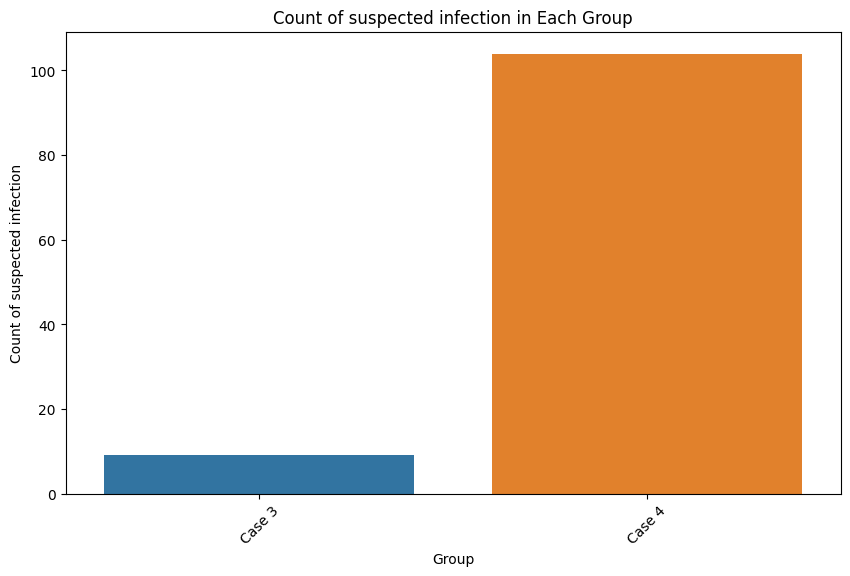

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 클래스 갯수 확인 12h
sns1 = result_11[(result_11['Annotation']=='no_circ')&(result_11['CIRC_next_12h']==0)]
sns2 = result_11[(result_11['Annotation']=='no_circ')&(result_11['CIRC_next_12h']==1)]
sns3 = result_11[(result_11['Annotation']=='circ')&(result_11['CIRC_next_12h']==0)]
sns4 = result_11[(result_11['Annotation']=='circ')&(result_11['CIRC_next_12h']==1)]

# 이진 변수의 개수 계산
binary_counts = [
    sns3['spinal_cord_injury'].sum(),
    sns4['spinal_cord_injury'].sum()
]

groups = [
    "Case 3",
    "Case 4"
]

# 시각화
plt.figure(figsize=(10, 6))  # 그래프의 크기 조절
sns.barplot(x=groups, y=binary_counts)
plt.title('Count of suspected infection in Each Group')
plt.ylabel('Count of suspected infection')
plt.xlabel('Group')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

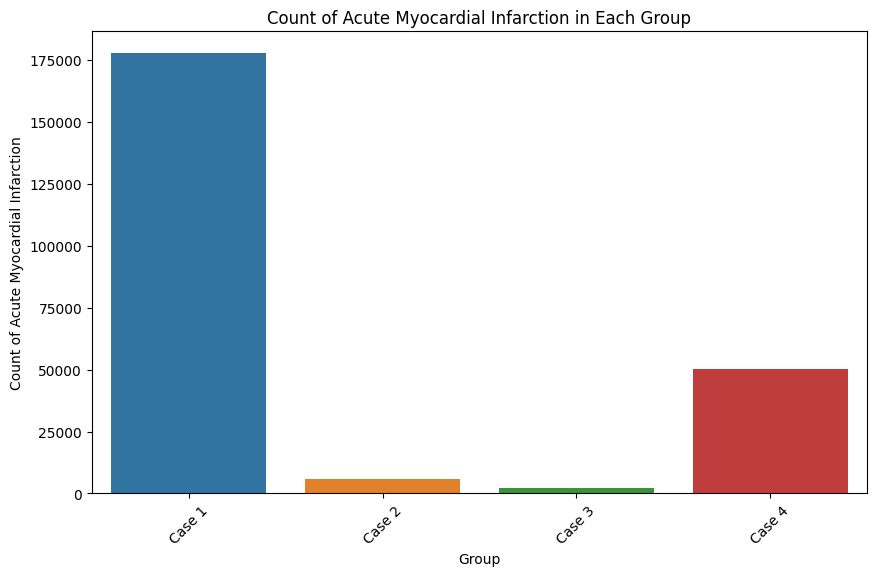

In [34]:
# 이진 변수의 개수 계산
binary_counts = [
    sns1['Acute_Myocardial_Infarction'].sum(),
    sns2['Acute_Myocardial_Infarction'].sum(),
    sns3['Acute_Myocardial_Infarction'].sum(),
    sns4['Acute_Myocardial_Infarction'].sum()
]

groups = [
    "Case 1",
    "Case 2",
    "Case 3",
    "Case 4"
]

# 시각화
plt.figure(figsize=(10, 6))  # 그래프의 크기 조절
sns.barplot(x=groups, y=binary_counts)
plt.title('Count of Acute Myocardial Infarction in Each Group')
plt.ylabel('Count of Acute Myocardial Infarction')
plt.xlabel('Group')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

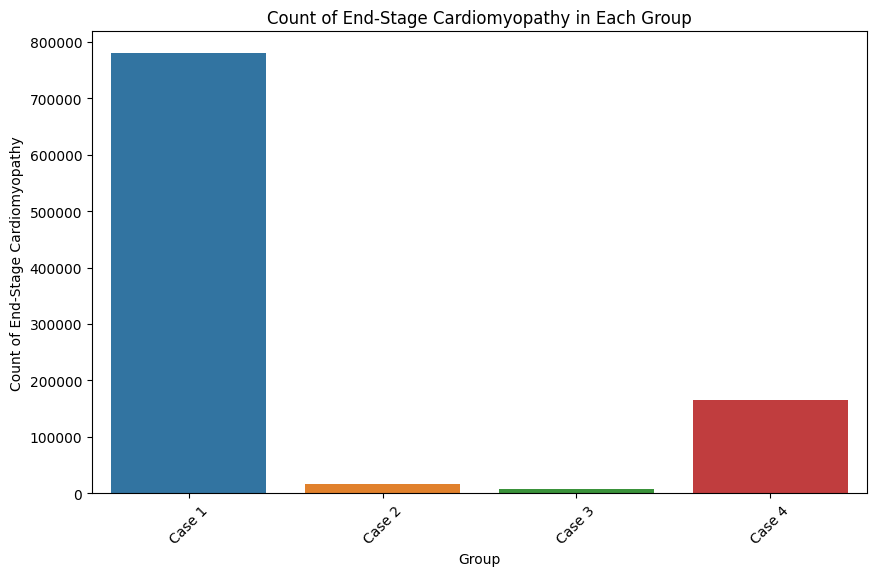

In [35]:
# 이진 변수의 개수 계산
binary_counts = [
    sns1['Arrhythmia'].sum(),
    sns2['Arrhythmia'].sum(),
    sns3['Arrhythmia'].sum(),
    sns4['Arrhythmia'].sum()
]

groups = [
    "Case 1",
    "Case 2",
    "Case 3",
    "Case 4"
]

# 시각화
plt.figure(figsize=(10, 6))  # 그래프의 크기 조절
sns.barplot(x=groups, y=binary_counts)
plt.title('Count of End-Stage Cardiomyopathy in Each Group')
plt.ylabel('Count of End-Stage Cardiomyopathy')
plt.xlabel('Group')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

In [36]:
def make_sofa_score(df):
    sample = df.copy()
    
    sample['Sofa_Respiration'] = None       # Respiratory system
    sample['Sofa_Coagulation'] = None       # Coagulation system
    sample['Sofa_Liver'] = None             # Hepatic system
    sample['Sofa_Cardiovascular'] = None    # Cardiovascular system
    sample['Sofa_GCS'] = None               # Neurologic system
    sample['Sofa_Urine'] = None             # Renal system
    
    
    # Respiratory system
    score_0 = sample[sample['PaO2/FiO2'] >= 400].index
    score_1 = sample[(sample['PaO2/FiO2'] < 400) & (sample['PaO2/FiO2'] >= 300)].index
    score_2 = sample[(sample['PaO2/FiO2'] < 300) & (sample['PaO2/FiO2'] >= 200)].index
    score_3 = sample[(sample['PaO2/FiO2'] < 200) & ((sample['None_Invasive_Ventilation'] > 0) | (sample['Invasive_Ventilation'] > 0))].index
    # Note: For score 4, we don't need to check for'PaO2/FiO2'< 200 since it's already included in score_3 condition.
    score_4 = sample[(sample['PaO2/FiO2'] < 100) & ((sample['None_Invasive_Ventilation'] > 0) | (sample['Invasive_Ventilation'] > 0))].index
    
    sample.loc[score_0, 'Sofa_Respiration'] = 0
    sample.loc[score_1, 'Sofa_Respiration'] = 1
    sample.loc[score_2, 'Sofa_Respiration'] = 2
    sample.loc[score_3, 'Sofa_Respiration'] = 3
    sample.loc[score_4, 'Sofa_Respiration'] = 4
    sample = sample.fillna(0)

    # Coagulation system
    score_0 = sample[sample['Platelet_Count'] >= 150].index
    score_1 = sample[(sample['Platelet_Count'] < 150) & (sample['Platelet_Count'] >= 100)].index
    score_2 = sample[(sample['Platelet_Count'] < 100) & (sample['Platelet_Count'] >= 50)].index
    score_3 = sample[(sample['Platelet_Count'] < 50) & (sample['Platelet_Count'] >= 20)].index
    score_4 = sample[sample['Platelet_Count'] < 20].index
    
    sample.loc[score_0, 'Sofa_Coagulation'] = 0
    sample.loc[score_1, 'Sofa_Coagulation'] = 1
    sample.loc[score_2, 'Sofa_Coagulation'] = 2
    sample.loc[score_3, 'Sofa_Coagulation'] = 3
    sample.loc[score_4, 'Sofa_Coagulation'] = 4

    # Hepatic system
    score_0 = sample[sample['total_bilirubin'] < 1.2].index
    score_1 = sample[(sample['total_bilirubin'] >= 1.2) & (sample['total_bilirubin'] <= 1.9)].index
    score_2 = sample[(sample['total_bilirubin'] >= 2) & (sample['total_bilirubin'] <= 5.9)].index
    score_3 = sample[(sample['total_bilirubin'] >= 6) & (sample['total_bilirubin'] <= 11.9)].index
    score_4 = sample[sample['total_bilirubin'] >= 12].index
    
    sample.loc[score_0, 'Sofa_Liver'] = 0
    sample.loc[score_1, 'Sofa_Liver'] = 1
    sample.loc[score_2, 'Sofa_Liver'] = 2
    sample.loc[score_3, 'Sofa_Liver'] = 3
    sample.loc[score_4, 'Sofa_Liver'] = 4

    # Cardiovascular system
    score_0 = sample[sample['MAP'] >= 70].index
    score_1 = sample[(sample['MAP'] < 70) & (sample['Dopamine'] <= 5) & (sample['Dobutamine'] == 0)].index
    score_2 = sample[((sample['Dopamine'] > 0) & (sample['Dopamine'] <= 5)) | (sample['Dobutamine'] > 0)].index
    score_3 = sample[((sample['Dopamine'] > 5) & (sample['Dopamine'] <= 15)) | ((sample['Epinephrine'] > 0) & (sample['Epinephrine'] <= 0.1)) | ((sample['Norepinephrine'] > 0) & (sample['Norepinephrine'] <= 0.1))].index
    score_4 = sample[(sample['Dopamine'] > 15) | (sample['Epinephrine'] > 0.1) | (sample['Norepinephrine'] > 0.1)].index
    
    sample.loc[score_0, 'Sofa_Cardiovascular'] = 0
    sample.loc[score_1, 'Sofa_Cardiovascular'] = 1
    sample.loc[score_2, 'Sofa_Cardiovascular'] = 2
    sample.loc[score_3, 'Sofa_Cardiovascular'] = 3
    sample.loc[score_4, 'Sofa_Cardiovascular'] = 4

    # Neurologic system
    score_0 = sample[sample['GCS_score'] == 15].index
    score_1 = sample[(sample['GCS_score'] >= 13) & (sample['GCS_score'] <= 14)].index
    score_2 = sample[(sample['GCS_score'] >= 10) & (sample['GCS_score'] <= 12)].index
    score_3 = sample[(sample['GCS_score'] >= 6)  & (sample['GCS_score'] <= 9)].index
    score_4 = sample[sample['GCS_score']<6].index
    
    sample.loc[score_0, 'Sofa_GCS'] = 0
    sample.loc[score_1, 'Sofa_GCS'] = 1
    sample.loc[score_2, 'Sofa_GCS'] = 2
    sample.loc[score_3, 'Sofa_GCS'] = 3
    sample.loc[score_4, 'Sofa_GCS'] = 4 

    # Renal system
    
    # Creatinine < 1.2, score 0
    score_0 = sample[sample['Creatinine'] < 1.2].index
    print(len(score_0))

    # Creatinine 1.2 - 1.9, score 1
    score_1 = sample[(sample['Creatinine'] >= 1.2) & (sample['Creatinine'] <= 1.9)].index

    # Creatinine 2.0 - 3.4, score 2
    score_2 = sample[(sample['Creatinine'] >= 2.0) & (sample['Creatinine'] <= 3.4)].index

    # Creatinine 3.5 - 4.9 OR Urine 200 - 500, score 3
    score_3 = sample[((sample['Creatinine'] >= 3.5) & (sample['Creatinine'] <= 4.9)) |
                    ((sample['urin_amount'] >= 200) & (sample['urin_amount'] <= 500))].index

    # Creatinine > 5 OR Urine < 200, score 4
    score_4 = sample[(sample['Creatinine'] > 5) | (sample['urin_amount'] < 200)].index


    # Assign scores to the 'Sofa_Urine' column based on the calculated indices
    sample.loc[score_4, 'Sofa_Urine'] = 4
    sample.loc[score_3, 'Sofa_Urine'] = 3
    sample.loc[score_2, 'Sofa_Urine'] = 2
    sample.loc[score_1, 'Sofa_Urine'] = 1
    sample.loc[score_0, 'Sofa_Urine'] = 0

    
    
    sample['SoFa_score'] = sample['Sofa_Respiration'] + sample['Sofa_Coagulation'] + sample['Sofa_Liver'] + sample['Sofa_Cardiovascular'] + sample['Sofa_GCS'] + sample['Sofa_Urine']
    
    # sample = sample.drop('pao2/fio2', axis = 1)
    
    return sample

#노이즈(fio2, pao2가 0인 경우)

# result_12 = result_11[~(result_11['PaO2']==0)|~(result_11['FiO2']==0)]

new_rr = make_sofa_score(result_11)

1737877


In [38]:
print('num case1', len(new_rr[(new_rr['Annotation']=='no_circ')&(new_rr['CIRC_next_12h']==0)]))
print('num case2', len(new_rr[(new_rr['Annotation']=='no_circ')&(new_rr['CIRC_next_12h']==1)]))
print('num case3', len(new_rr[(new_rr['Annotation']=='circ')&(new_rr['CIRC_next_12h']==0)]))
print('num case4', len(new_rr[(new_rr['Annotation']=='circ')&(new_rr['CIRC_next_12h']==1)]))

num case1 1695407
num case2 31842
num case3 13974
num case4 301976


In [39]:
def sepsis(df):
    sample = df.copy()
    
    sample['sepsis'] = 0
    sepsis_index = sample[(sample['suspected_infection']==1) & (sample['SoFa_score']>=2)].index
    sample.loc[sepsis_index, 'sepsis'] = 1
    
    print('sample')
    print(sample.sepsis.value_counts())
    
    return sample

result_4 = sepsis(new_rr)

sample
1    2109279
0     891261
Name: sepsis, dtype: int64


In [40]:
def septic_shock(df):
    sample = df.copy()
    
    sample['septic_shock'] = 0
    sepsis_index = sample[(sample['sepsis']==1) & (sample['Annotation']=='circ')].index
    sample.loc[sepsis_index, 'septic_shock'] = 1
    
    print('sample')
    print(sample.septic_shock.value_counts())
    
    return sample

result_5 = septic_shock(result_4)

sample
0    2763707
1     236833
Name: septic_shock, dtype: int64


In [41]:
result_5.Annotation.value_counts()

no_circ      1727249
ambiguous     957341
circ          315950
Name: Annotation, dtype: int64

In [45]:
# no_circ_state = result_5[(result_5['Annotation']=='no_circ')]

# drop_patient_case1_2 = no_circ_state[(no_circ_state['IABP'] == 1) | (no_circ_state['Impella'] == 1) | (no_circ_state['ECMO'] == 1)].stay_id.unique()
# drop_patient = drop_patient_case1_2

# print('제거 대상 입원 수 :', len(drop_patient))

제거 대상 입원 수 : 725


In [43]:
sns1 = result_5[(result_5['Annotation']=='no_circ')&(result_5['CIRC_next_12h']==0)]
sns2 = result_5[(result_5['Annotation']=='no_circ')&(result_5['CIRC_next_12h']==1)]
sns3 = result_5[(result_5['Annotation']=='circ')&(result_5['CIRC_next_12h']==0)]
sns4 = result_5[(result_5['Annotation']=='circ')&(result_5['CIRC_next_12h']==1)]

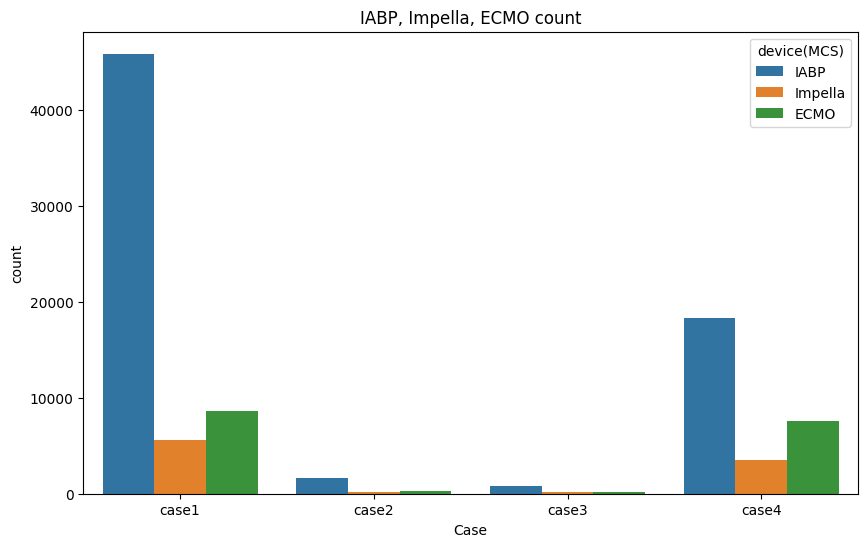

In [44]:
# case1과 case2 환자 중 circulatory support를 받고 있는 환자를 제거하지 않았을 떄의 분포

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df_list = [('case1', sns1), ('case2', sns2), ('case3', sns3), ('case4', sns4)]
data_for_plot = []

for df_name, df in df_list:
    for device in ['IABP', 'Impella', 'ECMO']:
        sum_of_device = df[device].sum()  # 이진 변수이므로, 1의 값을 모두 합하여 총합을 계산합니다.
        data_for_plot.append({'DataFrame': df_name, 'Device': device, 'Count': sum_of_device})


df_plot = pd.DataFrame(data_for_plot)

plt.figure(figsize=(10, 6))
sns.barplot(x='DataFrame', y='Count', hue='Device', data=df_plot)
plt.title('IABP, Impella, ECMO count')
plt.xlabel('Case')
plt.ylabel('count')
plt.legend(title='device(MCS)')

plt.show()


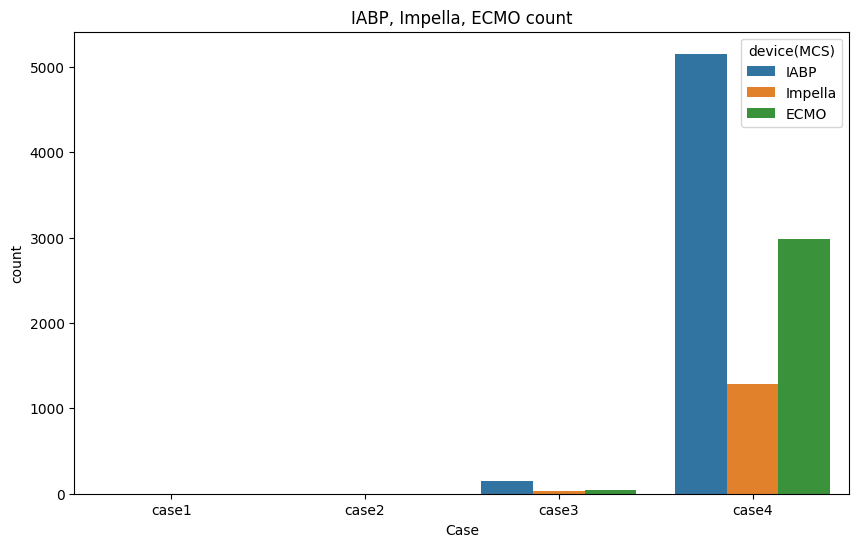

In [47]:
# case1과 case2 환자 중 circulatory support를 받고 있는 환자를 제거한 후의 비교

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

result_7 = result_5[~(result_5['stay_id'].isin(drop_patient))]

sns1 = result_7[(result_7['Annotation']=='no_circ')&(result_7['CIRC_next_12h']==0)]
sns2 = result_7[(result_7['Annotation']=='no_circ')&(result_7['CIRC_next_12h']==1)]
sns3 = result_7[(result_7['Annotation']=='circ')&(result_7['CIRC_next_12h']==0)]
sns4 = result_7[(result_7['Annotation']=='circ')&(result_7['CIRC_next_12h']==1)]

df_list = [('case1', sns1), ('case2', sns2), ('case3', sns3), ('case4', sns4)]
data_for_plot = []

for df_name, df in df_list:
    for device in ['IABP', 'Impella', 'ECMO']:
        sum_of_device = df[device].sum()  # 이진 변수이므로, 1의 값을 모두 합하여 총합을 계산합니다.
        data_for_plot.append({'DataFrame': df_name, 'Device': device, 'Count': sum_of_device})


df_plot = pd.DataFrame(data_for_plot)

plt.figure(figsize=(10, 6))
sns.barplot(x='DataFrame', y='Count', hue='Device', data=df_plot)
plt.title('IABP, Impella, ECMO count')
plt.xlabel('Case')
plt.ylabel('count')
plt.legend(title='device(MCS)')

plt.show()

In [52]:
target_col = ['HR', 'Respiratory Rate(Total)', 'SPO2', 'temperature_C', 'Peak_insp_P', 'CVP','PAPs', 'PaO2','FiO2',
            'Lactate','Norepinephrine', 'Dobutamine', 'Dopamine', 'Epinephrine','Vasopressin', 'MAP']

sample_col = ['Lactate','MAP']

diff_60=result_5[['stay_id','HR', 'Respiratory Rate(Total)', 'SPO2', 'temperature_C', 'Peak_insp_P', 'CVP','PAPs', 'PaO2','FiO2',
            'Lactate','Norepinephrine', 'Dobutamine', 'Dopamine', 'Epinephrine','Vasopressin', 'MAP']].astype(float).groupby('stay_id').diff(periods=1)

diff_180=result_5[['stay_id','HR', 'Respiratory Rate(Total)', 'SPO2', 'temperature_C', 'Peak_insp_P', 'CVP','PAPs', 'PaO2','FiO2',
            'Lactate','Norepinephrine', 'Dobutamine', 'Dopamine', 'Epinephrine','Vasopressin', 'MAP']].astype(float).groupby('stay_id').diff(periods=3)

diff_300=result_5[['stay_id','HR', 'Respiratory Rate(Total)', 'SPO2', 'temperature_C', 'Peak_insp_P', 'CVP','PAPs', 'PaO2','FiO2',
            'Lactate','Norepinephrine', 'Dobutamine', 'Dopamine', 'Epinephrine','Vasopressin', 'MAP']].astype(float).groupby('stay_id').diff(periods=5)

diff_maplactate_8=result_5[['stay_id','Lactate','MAP']].astype(float).groupby('stay_id').diff(periods=8)

diff_maplactate_12=result_5[['stay_id','Lactate','MAP']].astype(float).groupby('stay_id').diff(periods=12)

new_column_names = [str(col + '_1') for col in target_col]
diff_60.columns = new_column_names
diff_60 = diff_60.fillna(0)

rr2 = pd.concat([result_5, diff_60], axis = 1, ignore_index=False)

new_column_names = [str(col + '_3') for col in target_col]
diff_180.columns = new_column_names
diff_180 = diff_180.fillna(0)

rr3 = pd.concat([rr2, diff_180], axis = 1, ignore_index=False)

new_column_names = [str(col + '_5') for col in target_col]
diff_300.columns = new_column_names
diff_300 = diff_300.fillna(0)

result_8 = pd.concat([rr3, diff_300], axis = 1, ignore_index=False)

new_column_names = [str(col + '_8') for col in sample_col]
diff_maplactate_8.columns = new_column_names
diff_maplactate_8 = diff_maplactate_8.fillna(0)

result_9 = pd.concat([result_8, diff_maplactate_8], axis = 1, ignore_index=False)

new_column_names = [str(col + '_12') for col in sample_col]
diff_maplactate_12.columns = new_column_names
diff_maplactate_12 = diff_maplactate_12.fillna(0)

result_10 = pd.concat([result_9, diff_maplactate_12], axis = 1, ignore_index=False)

In [53]:
vaso_ino = ['Norepinephrine', 'Dobutamine', 'Dopamine', 'Epinephrine', 'Milrinone', 'Phenylephrine', 'Phenylephrine (200/250)',
            'Phenylephrine (50/250)', 'Vasopressin', 'Digoxin']

In [54]:
def make_extra_variable(df, vaso_ino):
    
    targ = df.copy()
    targ['vasoactive_use_cum_amount']=0
    unique_stay_ids = targ['stay_id'].unique()
    
    for vi_col in vaso_ino:
        
        col_name = f'Cumulative_{vi_col}'
        targ[col_name] = 0
        
    for i in tqdm(range(len(unique_stay_ids))):
        stay_id = unique_stay_ids[i]
        mask = targ['stay_id'] == stay_id
        
        for vi_col in vaso_ino:
            accumulate(targ, mask, vi_col)
    
    return targ

def accumulate(targ, mask, vi_col):
    
    targ.loc[mask, f'Cumulative_{vi_col}'] = targ.loc[mask, vi_col].cumsum()
    targ.loc[mask, 'vasoactive_use_cum_amount'] = targ.loc[mask, 'vasoactive/inotropic'].cumsum()
    
dataset = make_extra_variable(result_10, vaso_ino)

100%|██████████| 20767/20767 [13:32<00:00, 25.57it/s]


In [56]:
gc.collect()

2679

In [63]:
gc.collect()
dataset.to_csv('MIMIC-IV-CIRC(12h).csv.gz', compression='gzip')